In [88]:
import torch
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [89]:
for X, y in train_iter:
    print(X, y)
    print(X.shape)
    print(y.shape)
    break

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0667, 0.0353, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..

In [90]:
num_inputs = 28 * 28 # dataset provide image with 28 * 28 resolution
num_outputs = 10 # output is 10 kinds of object

In [91]:
def softmax(x):
    # should pass a 2-d tensor here, otherwise the sum method failed
    x_exp = torch.exp(x)
    exp_sum = x_exp.sum(1, keepdim = True)
    return x_exp / exp_sum

tmp = torch.normal(1., 1, (3, 3))
#tmp = torch.tensor([1, 2, 3]).reshape(1, -1)
tmp_softmax = softmax(tmp)
tmp_softmax, tmp_softmax.sum(1, keepdim = True)

(tensor([[0.1515, 0.5103, 0.3382],
         [0.1969, 0.5616, 0.2415],
         [0.2925, 0.5062, 0.2013]]),
 tensor([[1.0000],
         [1.0000],
         [1.0000]]))

In [92]:
W = torch.normal(0., 0.1, (num_inputs, num_outputs))
b = torch.zeros(num_outputs)
W, b

(tensor([[ 4.0563e-02,  1.4720e-01, -2.2879e-02,  ..., -6.9389e-02,
          -3.5275e-02,  1.3147e-01],
         [ 8.0536e-02, -4.4539e-02, -1.3201e-01,  ...,  1.3880e-03,
           3.5029e-02, -8.0276e-02],
         [ 9.9762e-02, -1.0242e-01, -2.4643e-02,  ...,  8.8546e-02,
           7.4957e-02, -1.6065e-01],
         ...,
         [-3.8972e-03,  6.4175e-02,  2.0187e-02,  ..., -5.9122e-02,
           4.2803e-02, -3.3040e-02],
         [ 3.5876e-02,  5.6786e-02,  1.9305e-01,  ...,  1.8194e-02,
          -1.5633e-05, -1.8943e-02],
         [ 1.1429e-01,  1.4682e-02, -1.0772e-01,  ..., -9.5553e-02,
          -2.9182e-02, -9.6842e-02]]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [93]:
def net(X, W, b):
    return softmax(torch.matmul(X.reshape(-1, W.shape[0]), W) + b)

In [94]:
def cross_entropy(y, y_hat):
    return -torch.log(y_hat[range(len(y_hat)), y])

tmp_y_hat = torch.tensor([[0.3, 0.3, 0.4], [0.1, 0.1, 0.8]])
tmp_y = torch.tensor([1, 1]).reshape(2, -1)
cross_entropy(tmp_y, tmp_y_hat)

tensor([[1.2040, 2.3026],
        [1.2040, 2.3026]])

In [95]:
stride = 0.01
lr = 0.1

def backward_gard(X, y, ls):
    W_row = W.shape[0]
    W_column = W.shape[1]
    W_diff = torch.zeros(W.shape)
    for i in range(W_row):
        for j in range(W_column):
            W_new = W.clone().detach()
            W_new[i][j] += stride
            ls_new = cross_entropy(y, net(X, W_new, b))
            Wij_grad = (ls_new.mean() - ls.mean()) / stride
            W_diff[i][j] = Wij_grad

    b_diff = torch.zeros(b.shape)
    for i in range(len(b)):
        b_new = b.clone().detach()
        b_new[i] += stride
        ls_new = cross_entropy(y, net(X, W, b_new))
        bi_grad = (ls_new.mean() - ls.mean()) / stride
        b_diff[i] = bi_grad

    # update W and b
    for i in range(W_row):
        for j in range(W_column):
            W[i][j] -= lr * W_diff[i][j]

    for i in range(len(b)):
        b[i] -= lr * b_diff[i]

In [96]:
def train():
    for X, y in train_iter:
        y_hat = net(X, W, b)
        ls = cross_entropy(y, y_hat)
        backward_gard(X, y, ls)

train()

In [97]:
W, b

(tensor([[ 0.0406,  0.1472, -0.0229,  ..., -0.0694, -0.0353,  0.1315],
         [ 0.0806, -0.0445, -0.1320,  ...,  0.0014,  0.0350, -0.0803],
         [ 0.1001, -0.1024, -0.0248,  ...,  0.0885,  0.0748, -0.1607],
         ...,
         [-0.0094,  0.0626,  0.0303,  ..., -0.0625,  0.0378, -0.0348],
         [ 0.0341,  0.0564,  0.1953,  ...,  0.0171, -0.0017, -0.0198],
         [ 0.1142,  0.0146, -0.1074,  ..., -0.0957, -0.0294, -0.0969]]),
 tensor([ 0.0210, -0.0093, -0.0470, -0.0294, -0.2382,  0.5562,  0.0634, -0.0160,
         -0.1585, -0.1993]))

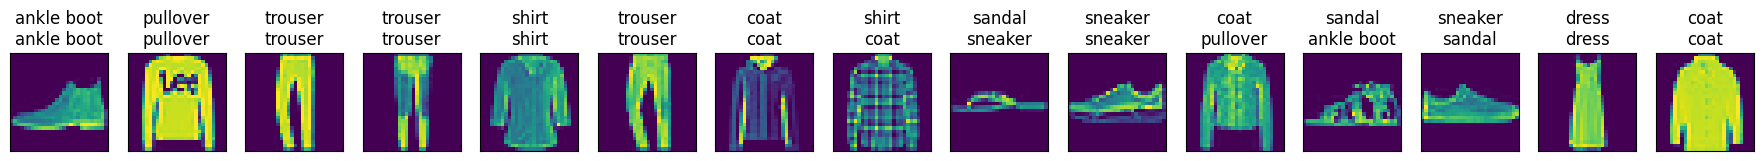

In [98]:
def predict(net, test_iter, n=15):  #@save
    """Predict labels (defined in Chapter 3)."""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X, W, b).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict(net, test_iter)

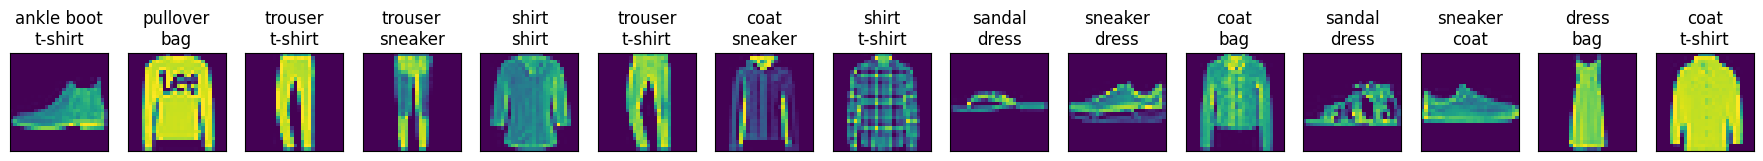

In [99]:
W = torch.normal(0., 0.1, (num_inputs, num_outputs))
b = torch.zeros(num_outputs)

#predict with random W and b
predict(net, test_iter)